## Recuperación Raúl Santiago Vásquez

Considere el siguiente circuito LC.

![imagen.png](attachment:imagen.png)

La ley de mallas establece la ecuación que se muestra a continuación:

\begin{equation}
\frac{Q}{500\times 10^{-6}} + 100\times 10^{-3}\frac{dI}{dt} = 0
\end{equation}

a) Encuentre la ecuación diferencial asociada para la carga eléctrica.

b) Usando Runge-Kutta de cuarto orden (No hay que usar Runge-Kutta-Fehlberg), hacer la gráfica de la función Q(t) tomando en cuenta que las condiciones iniciales son $Q(t=0) = 1\,\mu\text{C}$ e $I(t=0) = 0\text{ A}$. Haga la gráfica en un intervalo donde se pueda apreciar su comportamiento.


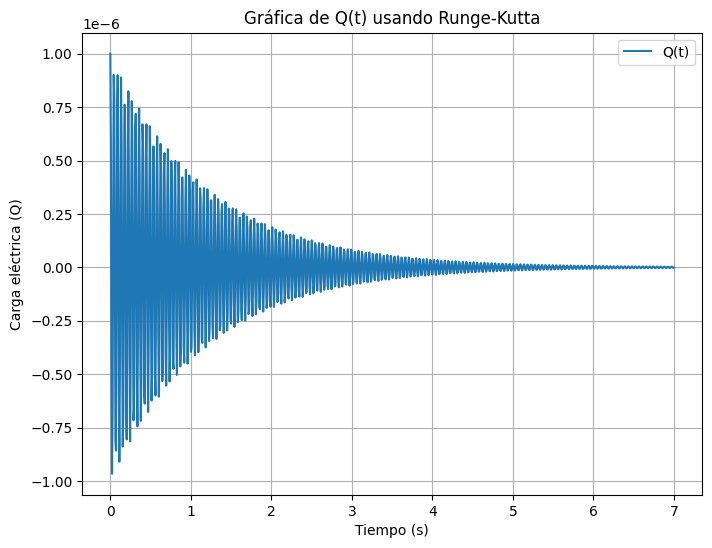

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la ecuación diferencial como un sistema de dos ecuaciones de primer orden
def dQ_dt(t, QI):
    Q, I = QI
    return [I, -20000 * Q]

# Método de Runge-Kutta de cuarto orden
def runge_kutta(dQ_dt, initial_conditions, t):
    QI = np.zeros((len(t), 2))
    QI[0] = initial_conditions
    h = t[1] - t[0]
    for i in range(0, len(t) - 1):
        k1 = h * np.array(dQ_dt(t[i], QI[i]))
        k2 = h * np.array(dQ_dt(t[i] + 0.5 * h, QI[i] + 0.5 * k1))
        k3 = h * np.array(dQ_dt(t[i] + 0.5 * h, QI[i] + 0.5 * k2))
        k4 = h * np.array(dQ_dt(t[i] + h, QI[i] + k3))
        QI[i + 1] = QI[i] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    return QI

# Condiciones iniciales
Q0 = 1e-6   # 1 μC
I0 = 0  # Inicialmente no hay corriente
initial_conditions = [Q0, I0]

# Intervalo de tiempo
t = np.linspace(0, 7, 1000)  # Cambia esto según el intervalo que desees

# Resolver la ecuación diferencial usando Runge-Kutta
QI_solution = runge_kutta(dQ_dt, initial_conditions, t)

# Gráfica de Q(t)
plt.figure(figsize=(8, 6))
plt.plot(t, QI_solution[:, 0], label='Q(t)')
plt.title('Gráfica de Q(t) usando Runge-Kutta')
plt.xlabel('Tiempo (s)')
plt.ylabel('Carga eléctrica (Q)')
plt.legend()
plt.grid(True)
plt.show()

